In [2]:
# install.packages("TopDom")
library(tidyverse)
library(TopDom)

─ Attaching packages ───────────────────────────────────── tidyverse 1.3.1 ─

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“程辑包‘tibble’是用R版本4.1.1 来建造的”
Warning message:
“程辑包‘tidyr’是用R版本4.1.1 来建造的”
Warning message:
“程辑包‘readr’是用R版本4.1.1 来建造的”
─ Conflicts ────────────────────────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



+ countsPerRegion: obj, 
+ ggCountHeatmap: obj, 
+ ggDomain: obj, 
+ ggDomainLabel: obj, 
+ legacy: obj, 
+ overlapScores: obj, 
+ readHiC: obj, 
+ subsetByRegion: obj, 
+ TopDom: obj, 
+ TopDom-data: obj, 

# countsPerRegion
## Description
Calculates Counts per Region in a TopDomData Object
## Usage
countsPerRegion(data, regions)
## Arguments
- data: A TopDomData object.
- regions: TopDom regions (a data.frame), e.g. domains.
## Value
A numeric vector of lengthnrow(regions).
## Author(s)
Henrik Bengtsson.

# ggCountHeatmap
## Description
Produce a Count Heatmap
## Usage
```R
ggCountHeatmap(
    data, 
    transform, 
    colors, 
    ...
)
```
## Arguments
- data: A TopDomData object.
- transform: A function applied to the counts prior to generating heatmap colors.
- colors: A named list to control to color scale.
- ...: Not used.
## Value
A ggplot2::ggplot object.
## Author(s)
Henrik Bengtsson.
## See Also
See TopDom for an example.

# ggDomain
## Description 
Add a Topological Domain to a Count Heatmap 
## Usage 
```R
ggDomain(
    td, 
    dx = NULL, 
    delta = 0.04, 
    vline = 0, 
    size = 2, 
    color = "#666666"
)
```
## Arguments  
- td: A single-row data.frame.  
- dx, delta, vline: Absolute distance to heatmap. If dx = NULL (default), then dx = delta * w + vline where w is the width of the domain.  
- size, color: The thickness and color of the domain line.  
## Value 
A ggplot2::geom_segment object to be added to the count heatmap.

# legacy
## Description 
Easy Access to the Original TopDom 0.0.1 and 0.0.2 Implementations  
## Usage 
```R
legacy(version = c("0.0.1", "0.0.2"))  
```
## Arguments 
version  A version string.  
## Value 
An environment containing the legacy TopDom API.  
## Examples 
```R
TopDom::legacy("0.0.2")$TopDom 

TopDom::legacy("0.0.1")$Detect.Local.Extreme
```

# ggDomainLabel
## Description
Add a Topological Domain Label to a Count Heatmap
## Usage
```R
ggDomainLabel(
    td,
    fmt = "%s: %.2f - %.2f Mbp",
    rot = 45,
    dx = 0,
    vjust = 2.5,
    cex = 1.5
)
```
## Arguments
- td: A single-row data.frame.
- fmt: The base::sprintf-format string taking (chromosome, start, stop) as (string, nu-meric, numeric) input.
- rot: The amount of rotation in [0,360] of label.
- dx, vjust: The vertical adjustment of the label (relative to rotation)
- cex: The scale factor of the label.
## Value
A ggplot2::ggproto object to be added to the count heatmap.

# overlapScores
## Description
Calculates Overlap Scores Between Two Sets of Topological Domains
## Usage
```R
overlapScores(a, reference, debug = getOption("TopDom.debug", FALSE))
```
## Arguments
- a, reference: Topological  domain  (TD)  setAand  TD  reference  setRboth  in  a  format  asreturned byTopDom().
- debug: If TRUE, debug output is produced.
## Details
Theoverlap score,overlap(A′, ri),  represents how well aconsecutivesubsetA′of topologicaldomains (TDs) inAoverlap with topological domainriin reference setR. For each reference TDri, thebest matchA′maxis identified, that is, theA′subset that maximizeoverlap(A′, ri).  Forexact definitions, see Page 8 in Shin et al. (2016).

Note that the overlap score is an asymmetric score,  which means thatoverlapScores(a,b) !=overlapScores(b,a).

## Value
Returns a named list of classTopDomOverlapScores, where the names correspond to the chromo-somes in domain reference setR.  Each of these chromosome elements contains a data.frame with fields:

- chromosome-DR,ccharacter strings
- best_score-DR,cnumerics in[0,1]
- best_length-DR,cpositive integers
- best_set- list ofDR,c index vectors

whereDR,cis the number of TDs in reference setRon chromosomec.  If a TD in referenceRisnot a"domain", then the correspondingbest_scoreandbest_lengthvalues areNA_real_andNA_integer_, respectively, whilebest_setis an empty list.
## Warning - This might differ not be the correct implementation
The original TopDom scripts do not provide an implementation for calculating overlap scores.  In-stead,  the  implementation  ofTopDom::overlapScores()is  based  on  the  textual  description  ofoverlap scores provided in Shin et al. (2016). It is not known if this is the exact same algorithm andimplementation as the authors of the TopDom article used.
## Author(s)
Henrik Bengtsson - based on the description in Shin et al. (2016).
## References
- Shin et al., TopDom: an efficient and deterministic method for identifying topological domainsin  genomes,Nucleic Acids Research,  44(7):  e70,  April  2016.   doi:  10.1093/nar/gkv1505,PMCID: PMC4838359, PMID: 26704975
## See Also
TopDom.

# readHiC
## Description
从文件中读取Hi-C Contact Data
## Usage
```R
readHiC(
    file,
    chr = NULL,
    binSize = NULL,
    ...,
    debug = getOption("TopDom.debug", FALSE)
)
```
## Arguments
- file: normalized Hi-C contact matrix文件的路径名，该文件需要以空格为分隔符，支持gz文件。
- chr, binSize: 如果文件包含一个没有bin注释的计数矩阵，则使用binSize参数指定binSize。
- debug: 如果为TRUE，则生成调试输出。
- ...: 传递给utils::read.table()的参数。

## Value

返回一个list，其中包含两个tibble表格，其中一个包含4列，为bin tibble，data\$bin:

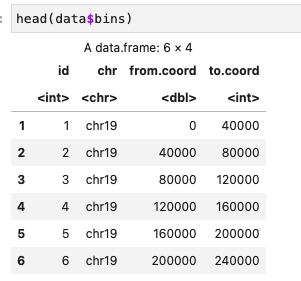

另一个为包含N行N列的计数矩阵 counts tibble，data\$counts:

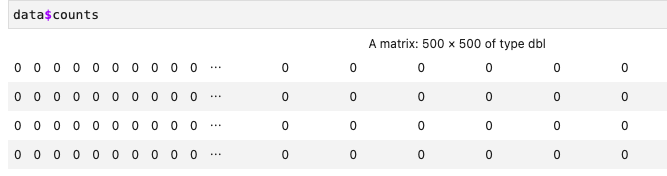

## Format of HiC contact-matrix file
Contact matrix文件应该是一个以空格分隔的文本文件，既没有行名也没有列名。文件内容应该是一个N行 × (3+N)列的表格。

其中前三列为：
 - chr (string),
 - from.coord (integer position),
 - to.coord (integer position). 
后面N列为normalized contact counts (float) matrix。使该表中的点(r,3+c)对应normalized contact counts matrix中的计数(r,c)。

如果是N行 × (4+N)列的表格，则第一列一定是id(integer)。其余3+N列如上所述。

Example:

chr10       0   40000  0 0 0 0 ...

chr10   40000   80000  0 0 0 0 ...

chr10   80000  120000  0 0 0 0 ...

chr10  120000  160000  0 0 0 0 ...

...

In [16]:
path <- system.file("exdata", package = "TopDom", mustWork = TRUE)
## Original count data (on a subset of the bins to speed up example) 
chr <- "chr19"
pathname <- file.path(path, sprintf("nij.%s.gz", chr))
data <- readHiC(pathname, chr = chr, binSize = 40e3, bins = 1:500)
data

TopDomData:
bins:
'data.frame':	500 obs. of  4 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
 $ to.coord  : int  40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
counts:
 num [1:500, 1:500] 0 0 0 0 0 0 0 0 0 0 ...

In [17]:
head(data$bins)

,id,chr,from.coord,to.coord
,<int>,<chr>,<dbl>,<int>
1,1,chr19,0,40000
2,2,chr19,40000,80000
3,3,chr19,80000,120000
4,4,chr19,120000,160000
5,5,chr19,160000,200000
6,6,chr19,200000,240000


In [28]:
head(data$counts)

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [19]:
## Find topological domains using TopDom method for two window sizes
tds_5 <- TopDom(data, window.size = 5L)
tds_6 <- TopDom(data, window.size = 6L)

In [24]:
## Overlap scores (in both directions)
overlap_56 <- overlapScores(tds_6, reference = tds_5)
overlap_56

chromosome,best_score,best_length,best_set
<chr>,<dbl>,<int>,<list>
chr19,1.0000000,200000,1
chr19,0.0000000,440000,
chr19,1.0000000,280000,1
chr19,0.8888889,440000,1
chr19,0.5333333,280000,1
chr19,0.9333333,240000,1
chr19,0.9166667,480000,2
chr19,1.0000000,480000,2
chr19,0.9230769,480000,1


In [23]:
as_tibble(overlap_56)

,chromosome,best_score,best_length,best_set
,<chr>,<dbl>,<int>,<list>
chr19.1,chr19,1.0000000,200000,1
chr19.2,chr19,0.0000000,440000,
chr19.3,chr19,1.0000000,280000,1
chr19.4,chr19,0.8888889,440000,1
chr19.5,chr19,0.5333333,280000,1
chr19.6,chr19,0.9333333,240000,1
chr19.7,chr19,0.9166667,480000,2
chr19.8,chr19,1.0000000,480000,2
chr19.9,chr19,0.9230769,480000,1


In [25]:
overlap_65 <- overlapScores(tds_5, reference = tds_6)
overlap_65

chromosome,best_score,best_length,best_set
<chr>,<dbl>,<int>,<list>
chr19,1.0000000,200000,1
chr19,0.8571429,240000,1
chr19,0.7272727,360000,2
chr19,1.0000000,600000,"2, 3"
chr19,0.9166667,480000,1
chr19,1.0000000,440000,1
chr19,1.0000000,520000,1
chr19,1.0000000,280000,1
chr19,1.0000000,680000,1


In [26]:
as_tibble(overlap_65)

,chromosome,best_score,best_length,best_set
,<chr>,<dbl>,<int>,<list>
chr19.1,chr19,1.0000000,200000,1
chr19.2,chr19,0.8571429,240000,1
chr19.3,chr19,0.7272727,360000,2
chr19.4,chr19,1.0000000,600000,"2, 3"
chr19.5,chr19,0.9166667,480000,1
chr19.6,chr19,1.0000000,440000,1
chr19.7,chr19,1.0000000,520000,1
chr19.8,chr19,1.0000000,280000,1
chr19.9,chr19,1.0000000,680000,1


In [39]:
path <- system.file("exdata", package = "TopDom", mustWork = TRUE) 
## Original count data 
chr <- "chr19" 
pathname <- file.path(path, sprintf("nij.%s.gz", chr)) 
data <- readHiC(pathname, chr = chr, binSize = 40e3) 
print(data) 
str(data)

TopDomData:
bins:
'data.frame':	1534 obs. of  4 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
 $ to.coord  : int  40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
counts:
 num [1:1534, 1:1534] 0 0 0 0 0 0 0 0 0 0 ...
List of 2
 $ bins  :'data.frame':	1534 obs. of  4 variables:
  ..$ id        : int [1:1534] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ chr       : chr [1:1534] "chr19" "chr19" "chr19" "chr19" ...
  ..$ from.coord: num [1:1534] 0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
  ..$ to.coord  : int [1:1534] 40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
 $ counts: num [1:1534, 1:1534] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "class")= chr "TopDomData"


# subsetByRegion
## Description 
Subset a TopDomData Object by Region 
## Usage 
```R
subsetByRegion(data, region, margin = 1/2)
```
## Arguments
- data: A TopDomData object.
- region: A TopDom domain (a data.frame).
- margin: An non-negative numeric specifying the additional margin extracted around thedomain.  Ifmargin < 1, then the size of the margin is relative to the size of thedomain.
## Value
A TopDomData object.
## Author(s)
Henrik Bengtsson.

# TopDom
## Description
Identify Topological Domains from a Hi-C Contact Matrix
## Usage
```R
TopDom(
    data,
    window.size,
    outFile = NULL,
    statFilter = TRUE,
    ...,
    debug = getOption("TopDom.debug", FALSE)
)
```
## Arguments
- data: A TopDomData object, or the path name to a normalized Hi-C contact matrix file as read byreadHiC(), that specify N bins.
- window.size: The number of bins to extend (as a non-negative integer). Recommended rangeis in 5, ..., 20.
- outFile: (optional), The filename without extension of the three result files optionally produced. See details below.
- statFilter: (logical), Specifies whether non-significant topological-domain boundaries should be dropped or not.
- ...: Additional arguments passed toreadHiC().
- debug: If TRUE, debug output is produced.

## Value 
A named list of class TopDom with data.frame elements binSignal, domain, and bed. 
- The binSignal data frame (N-by-7) holds mean contact frequency, local extreme, and pvalue for every bin. The ﬁrst four columns represent basic bin information given by matrix ﬁle, such as bin id (id), chromosome(chr), start coordinate (from.coord), and end coordinate (to.coord) for each bin. The last three columns (local.ext, mean.cf, and p-value) represent computed values by the TopDom algorithm. The columns are: 
    – id: Bin ID 
    – chr: Chromosome 
    – from.coord: Start coordinate of bin 
    – to.coord: End coordinate of bin 
    – local.ext: 
        - * -1: Local minima. 
        - * -0.5: Gap region. 
        - * 0: General bin. 
        - * 1: Local maxima. 
    – mean.cf: Average of contact frequencies between lower and upper regions for bin i = 1,2,...,N. 
    – p-value: Computed p-value by Wilcox rank sum test. See Shin et al. (2016) for more details. 
- The domain data frame (D-by-7): Every bin is categorized by basic building block, such as gap, domain, or boundary. Each row indicates a basic building block. The ﬁrst ﬁve columns include the basic information about the block, ’tag’ column indicates the class of the building block. 
    – id: Identiﬁer of block 
    – chr: Chromosome 
    – from.id: Start bin index of the block 
    – from.coord: Start coordinate of the block 
    – to.id: End bin index of the block 
    – to.coord: End coordinate of the block 
    – tag: Categorized name of the block. Three possible blocks exists: 
        - * gap 
        - * domain 
        - * boundary 
    – size: size of the block 
- The bed data frame (D-by-4) is a representation of the domain data frame in the BED ﬁle format. It has four columns: 
    – chrom: The name of the chromosome. 
    – chromStart: The starting position of the feature in the chromosome. The ﬁrst base in a chromosome is numbered 0. 
    – chromEnd: The ending position of the feature in the chromosome. The chromEnd base is not included in the feature. For example, the ﬁrst 100 bases of a chromosome are deﬁned as chromStart=0, chromEnd=100, and span the bases numbered 0-99.
    – name: Deﬁnes the name of the BED line. This label is displayed to the left of the BED line in the UCSC Genome Browser window when the track is open to full display mode or directly to the left of the item in pack mode. 

If argument outFile is non-NULL, then the three elements (binSignal, domain, and bed) returned are also written to tab-delimited ﬁles with ﬁle names ‘<outFile>.binSignal’, ‘<outFile>.domain’, and ‘<outFile>.bed’, respectively. None of the ﬁles have row names, and all but the BED ﬁle have column names. 

## Windows size 
The window.size parameter is by design the only tuning parameter in the TopDom method and affects the amount of smoothing applied when calculating the TopDom bin signals. The binning window extends symmetrically downstream and upstream from the bin such that the bin signal is the average window.size^2 contact frequencies. For details, see Equation (1) and Figure 1 in Shin et al. (2016). Typically, the number of identiﬁed TDs decreases while their average lengths increase as this window-size parameter increases (Figure 2). The default is window.size = 5 (bins), which is motivated as: "Considering the previously reported minimum TD size (approx. 200 kb) (Dixon et al., 2012) and our bin size of 40 kb, w[indow.size] = 5 is a reasonable setting" (Shin et al., 2016).

In [29]:
path <- system.file("exdata", package = "TopDom", mustWork = TRUE)
path

[1] "/lustre1/chengqiyi_pkuhpc/zhaohn/0.apps/miniconda3/lib/R/library/TopDom/exdata"

In [30]:
## Original count data (on a subset of the bins to speed up example) 
chr <- "chr19"

In [31]:
pathname <- file.path(path, sprintf("nij.%s.gz", chr)) 
data <- readHiC(pathname, chr = chr, binSize = 40e3, bins = 1:500) 
print(data) ## a TopDomData object

TopDomData:
bins:
'data.frame':	500 obs. of  4 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
 $ to.coord  : int  40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
counts:
 num [1:500, 1:500] 0 0 0 0 0 0 0 0 0 0 ...


In [32]:
## Find topological domains using the TopDom method 
fit <- TopDom(data, window.size = 5L) 
print(fit) ## a TopDom object

TopDom:
Parameters:
- window.size: 5
- statFilter: TRUE
binSignal:
'data.frame':	500 obs. of  7 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
 $ to.coord  : int  40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
 $ local.ext : num  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 ...
 $ mean.cf   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pvalue    : num  1 1 1 1 1 1 1 1 1 1 ...
domain:
'data.frame':	42 obs. of  7 variables:
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.id   : int  1 78 83 94 101 112 119 125 137 149 ...
 $ from.coord: num  0 3080000 3280000 3720000 4000000 4440000 4720000 4960000 5440000 5920000 ...
 $ to.id     : int  77 82 93 100 111 118 124 136 148 160 ...
 $ to.coord  : num  3080000 3280000 3720000 4000000 4440000 4720000 4960000 5440000 5920000 6400000 ...
 $ tag       : chr  "gap" 

In [33]:
## Display the largest domain 
td <- subset(subset(fit$domain, tag == "domain"), size == max(size)) 
print(td) ## a data.frame

     chr from.id from.coord to.id to.coord    tag    size
40 chr19     438   17480000   466 18640000 domain 1160000


In [34]:
## Subset TopDomData object 
data_s <- subsetByRegion(data, region = td, margin = 0.9999) 
print(data_s) ## a TopDomData object

TopDomData:
bins:
'data.frame':	85 obs. of  4 variables:
 $ id        : int  410 411 412 413 414 415 416 417 418 419 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  16360000 16400000 16440000 16480000 16520000 ...
 $ to.coord  : int  16400000 16440000 16480000 16520000 16560000 16600000 16640000 16680000 16720000 16760000 ...
counts:
 num [1:85, 1:85] 29.3 43.6 28 27.1 23.9 ...


Warning message in grid.Call.graphics(C_setviewport, vp, TRUE):
“无法修剪至旋转了的視窗中”


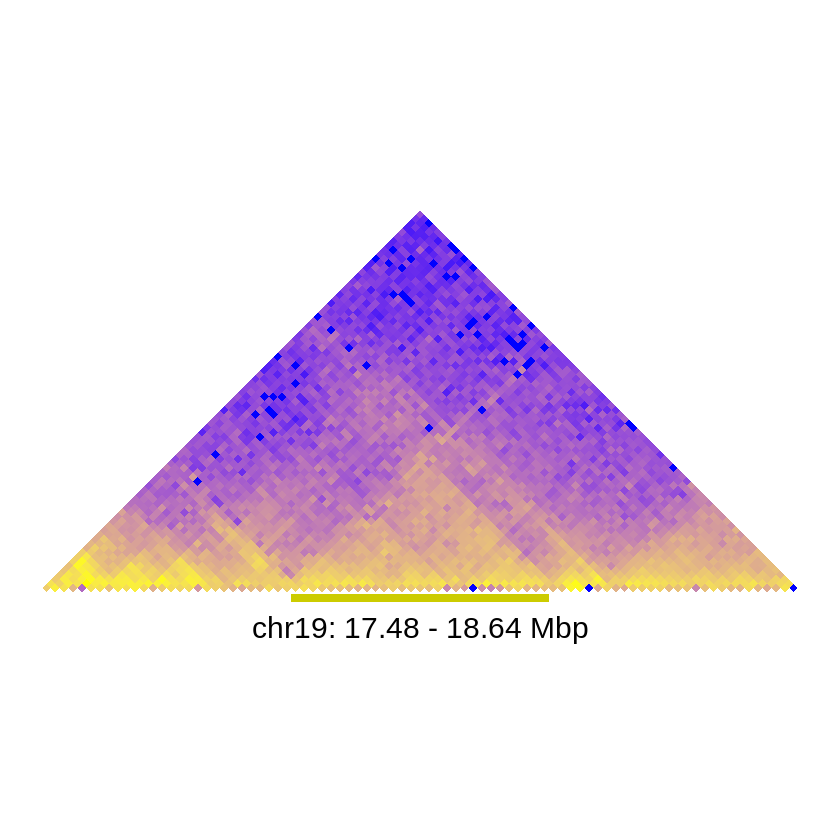

In [35]:
vp <- grid::viewport(angle = -45, width = 0.7, y = 0.3) 
gg <- ggCountHeatmap(data_s) 
gg <- gg + ggDomain(td, color = "#cccc00") + ggDomainLabel(td) 
print(gg, newpage = TRUE, vp = vp)

Warning message in grid.Call.graphics(C_setviewport, vp, TRUE):
“无法修剪至旋转了的視窗中”


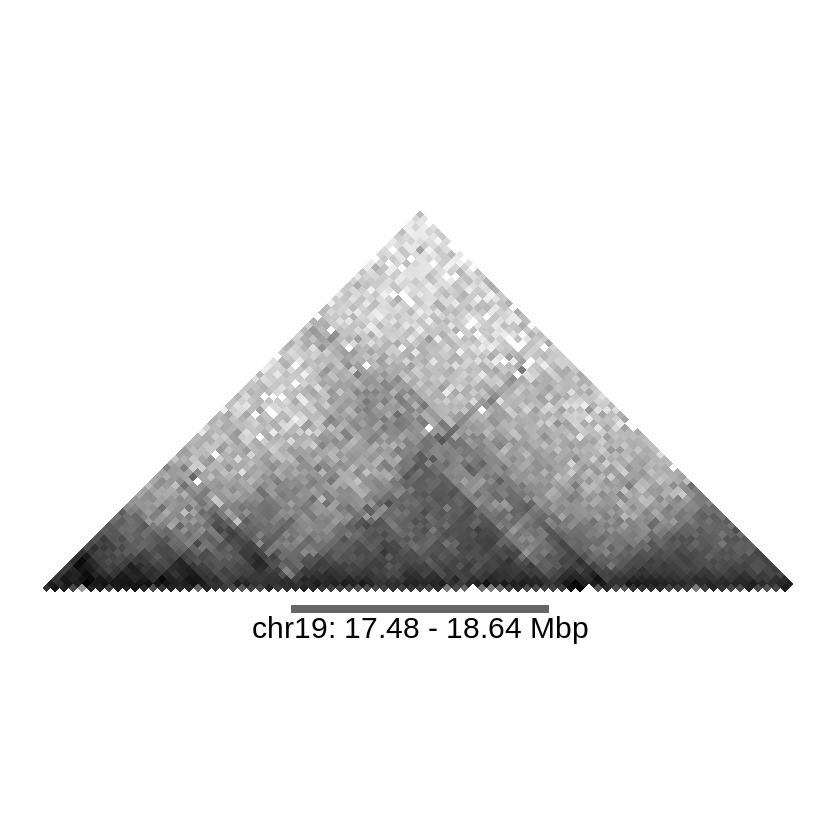

In [36]:
gg <- ggCountHeatmap(data_s, colors = list(mid = "white", high = "black")) 
gg_td <- ggDomain(td, delta = 0.08) 
dx <- attr(gg_td, "gg_params")$dx 
gg <- gg + gg_td + ggDomainLabel(td, vjust = 2.5) 
print(gg, newpage = TRUE, vp = vp)

TopDom:
Parameters:
 - N/A
binSignal:
'data.frame':	500 obs. of  7 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.coord: num  0 40000 80000 120000 160000 200000 240000 280000 320000 360000 ...
 $ to.coord  : int  40000 80000 120000 160000 200000 240000 280000 320000 360000 400000 ...
 $ local.ext : num  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 ...
 $ mean.cf   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pvalue    : num  1 1 1 1 1 1 1 1 1 1 ...
domain:
'data.frame':	6 obs. of  7 variables:
 $ chr       : chr  "chr19" "chr19" "chr19" "chr19" ...
 $ from.id   : int  411 418 423 431 438 467
 $ from.coord: num  16400000 16680000 16880000 17200000 17480000 ...
 $ to.id     : int  417 422 430 437 466 473
 $ to.coord  : num  16680000 16880000 17200000 17480000 18640000 ...
 $ tag       : chr  "domain" "domain" "domain" "domain" ...
 $ size      : num  280000 200000 320000 280000 1160000 280000
bed:
'data.frame':	6 obs. of 

Warning message in grid.Call.graphics(C_setviewport, vp, TRUE):
“无法修剪至旋转了的視窗中”


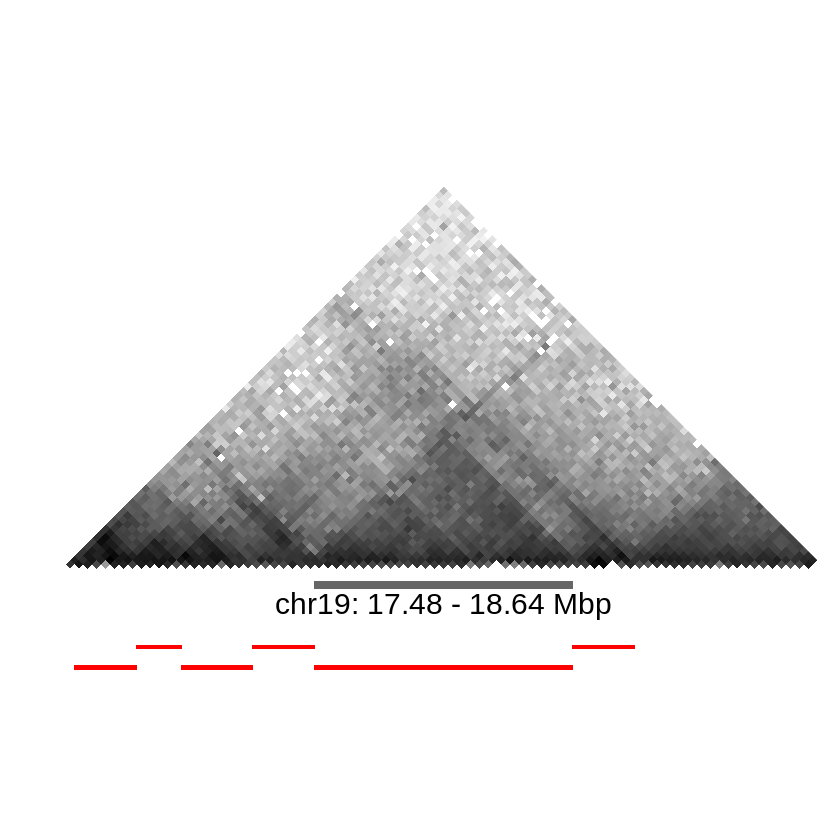

In [37]:
## Subset TopDom object 
fit_s <- subsetByRegion(fit, region = td, margin = 0.9999) 
print(fit_s) ## a TopDom object 
for (kk in seq_len(nrow(fit_s$domain))) { 
    gg <- gg + ggDomain(fit_s$domain[kk, ], dx = dx * (4 + kk %% 2), color = "red", size = 1) 
}
print(gg, newpage = TRUE, vp = vp)

Warning message in grid.Call.graphics(C_setviewport, vp, TRUE):
“无法修剪至旋转了的視窗中”


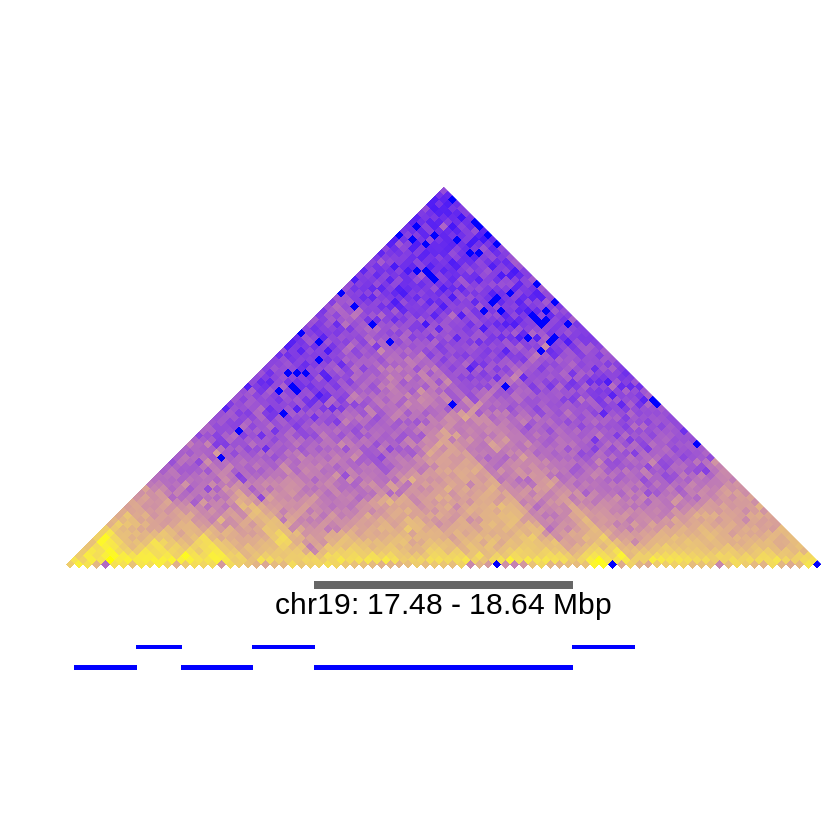

In [38]:
gg <- ggCountHeatmap(data_s) 
gg_td <- ggDomain(td, delta = 0.08) 
dx <- attr(gg_td, "gg_params")$dx 
gg <- gg + gg_td + ggDomainLabel(td, vjust = 2.5) 
fit_s <- subsetByRegion(fit, region = td, margin = 0.9999) 
for (kk in seq_len(nrow(fit_s$domain))) { 
    gg <- gg + ggDomain(fit_s$domain[kk, ], dx = dx * (4 + kk %% 2), color = "blue", size = 1) 
} 
print(gg, newpage = TRUE, vp = vp)

# TopDom-data
## Description 
The ‘exdata/’ folder of this package provides a example data set used in examples. The data are also used to validate the TopDom implementation toward the original TopDom scripts.  
## Origin 
The data herein contain a tiny subset of the HiC and TopDom data used in the TopDom study (Shin et al., 2016). More precisely, it contains: 

1. A TopDom ﬁle ‘mESC_5w_chr19.nij.HindIII.comb.40kb.domain’, which is part of the ‘mESC_5w_domain.zip’ ﬁle (5,504 bytes; md5 ffb19996f681a4d35d5c9944f2c44343) from the Supplementary Materials of Shin et al. (2016). These data were downloaded from the TopDom website (http://zhoulab.usc.edu/TopDom/ - now defunct). 
2. A normalized HiC-count matrix ﬁle ‘nij.chr19.gz’, where the non-compressed version is part of the ‘mESC.norm.tar.gz’ ﬁle (1,305,763,679 bytes; md5 2e79d0f57463b5b7c4bf86b187086d3c) originally downloaded from the UCSD Ren Lab. It is a tab-delimited ﬁle containing a 3250by-3250 numeric matrix non-negative decimal values. The underlying HiC sequence data is available from GSE35156 on GEO and was published part of Dixon, et al. (2012).

## References
1.  Dixon JR, Selvaraj S, Yue F, Kim A, et al.   Topological domains in mammalian genomesidentified by analysis of chromatin interactions. Nature 2012 Apr 11; 485(7398):376-80, doi:10.1038/nature11082, PMCID: PMC3356448, PMID: 22495300.
2.  Shin, et al., TopDom:  an efficient and deterministic method for identifying topological do-mains in genomes, Nucleic Acids Res. 2016 Apr 20; 44(7): e70., 2016. doi: 10.1093/nar/gkv1505,PMCID: PMC4838359, PMID: 26704975.